<a href="https://colab.research.google.com/github/Sahithya1509/6220/blob/main/6220%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principle Component Analysis and diagnosis of Anemia

In [12]:
!pip install pycaret

Import Libraries


In [13]:
import pandas as pd

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


Dataset

Anemia Dataset is obtained from Kaggle. Total of 104 eye conjunctive images have been collected and their blood hemoglobin level and Anemic Condition from three Medical College Hospital in Bangladesh. After that, values are preprocessed and cropped the images and extract the percentage of red, green and blue pixels from the image and stored it in a CSV file.
There are 5 attributes . 0 represents no diagnosis 1 represents diagnosis of anemia.
The original dataset can be found on below link:  https://www.kaggle.com/datasets/nahiyan1402/anemiadataset



In [19]:
csv_url = 'https://raw.githubusercontent.com/Sahithya1509/6220at/Anemia_Dataset.csv'

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/Sahithya1509/6220/main/Anemia_Dataset.csv')

In [21]:
df.head()

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Diagnosis
0,47.6372,26.7953,25.5675,15.1,0
1,45.6906,30.0735,24.2359,9.1,1
2,43.4098,31.2315,25.3586,12.9,0
3,44.4252,28.7436,26.8312,14.7,0
4,44.3297,28.7617,26.9086,14.1,0


In [22]:
len(df.index)

104

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0      %Red Pixel  104 non-null    float64
 1   %Green pixel   104 non-null    float64
 2   %Blue pixel    104 non-null    float64
 3   Hb             104 non-null    float64
 4   Diagnosis      104 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.2 KB


In [24]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [25]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

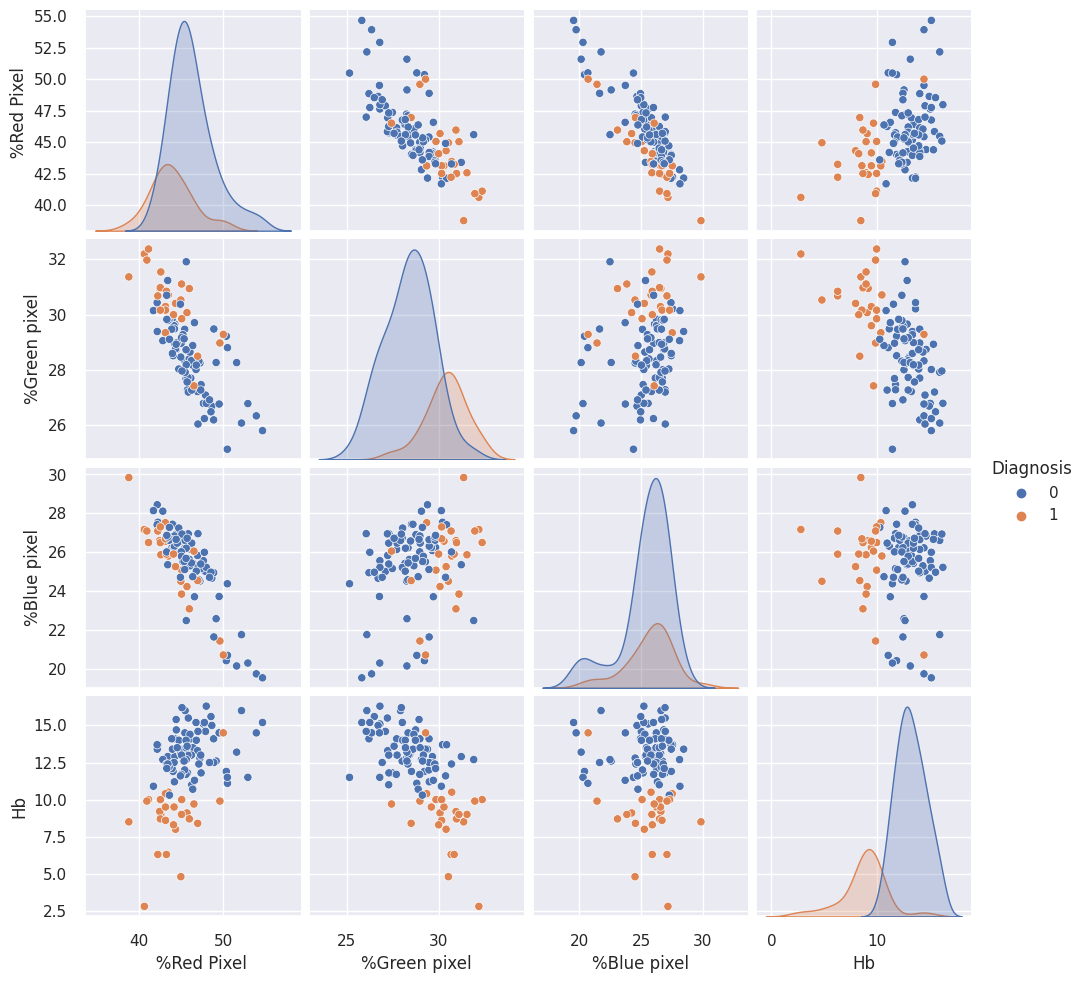

In [26]:
sns.pairplot(df, hue='Diagnosis')
plt.show()

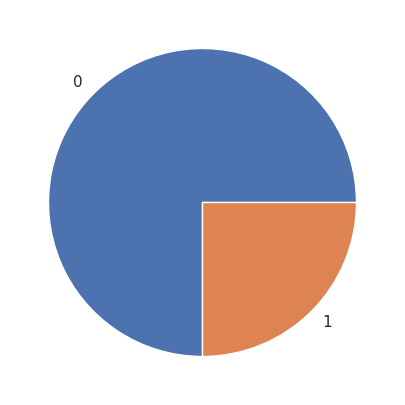

In [27]:
y =df['Diagnosis']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [28]:
X = df.drop(columns=['Diagnosis'])
X.head(10)

,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,47.6372,26.7953,25.5675,15.1
1,45.6906,30.0735,24.2359,9.1
2,43.4098,31.2315,25.3586,12.9
3,44.4252,28.7436,26.8312,14.7
4,44.3297,28.7617,26.9086,14.1
5,47.8913,27.0952,25.0135,14.6
6,42.2473,30.2089,27.5438,13.7
7,44.2572,29.6578,26.0850,12.9
8,48.6358,26.6982,24.6660,15.0
9,42.1652,29.3907,28.4441,13.4


In [29]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
%Red Pixel,104.0,45.654175,2.816294,38.7968,43.911375,45.38535,46.968325,54.6478
%Green pixel,104.0,28.875507,1.554275,25.1403,27.871300,28.94875,29.887275,32.3681
%Blue pixel,104.0,25.470325,1.984671,19.5413,24.896425,25.95320,26.721600,29.8414
Hb,104.0,12.150962,2.512957,2.8000,10.650000,12.60000,14.000000,16.3000


**Standardize the Data**



In [30]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,0.707536,-1.344859,0.049200,1.179216
1,0.012996,0.774506,-0.624992,-1.219972
2,-0.800784,1.523155,-0.056567,0.299514
3,-0.438493,-0.085278,0.689013,1.019271
4,-0.472567,-0.073576,0.728201,0.779352
5,0.798197,-1.150973,-0.231291,0.979284
6,-1.215560,0.862042,1.049804,0.619406
7,-0.498435,0.505754,0.311211,0.299514
8,1.063832,-1.407634,-0.407231,1.139230
9,-1.244853,0.333074,1.505627,0.499446


In [31]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
%Red Pixel,104.0,-8.967186e-16,1.004843,-2.446685,-0.621824,-0.095916,0.468884,3.208890
%Green pixel,104.0,-3.757678e-16,1.004843,-2.414820,-0.649222,0.047352,0.654111,2.257970
%Blue pixel,104.0,-1.238326e-15,1.004843,-3.001876,-0.290567,0.244480,0.633523,2.213083
Hb,104.0,-2.732857e-16,1.004843,-3.739120,-0.600182,0.179555,0.739365,1.659054


**Observations and Variables**

In [32]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

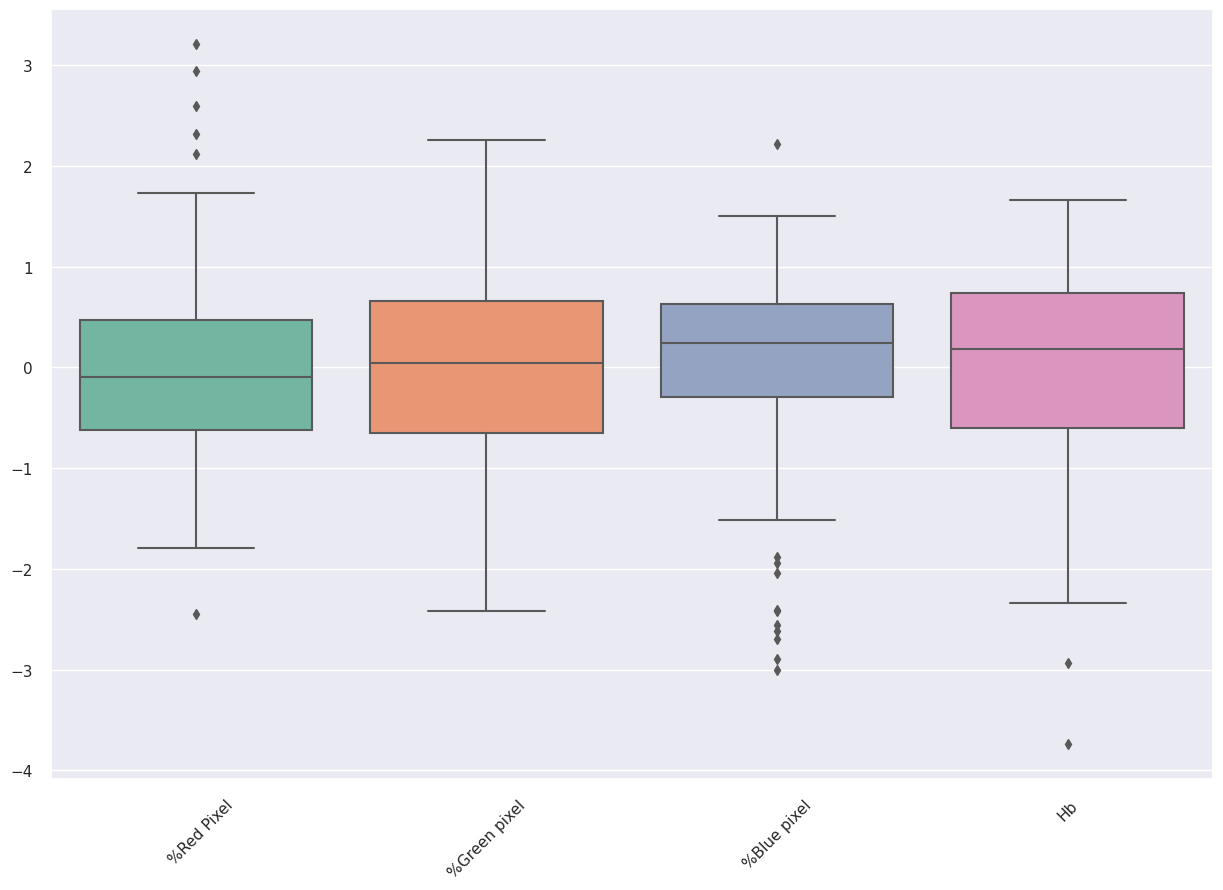

In [33]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

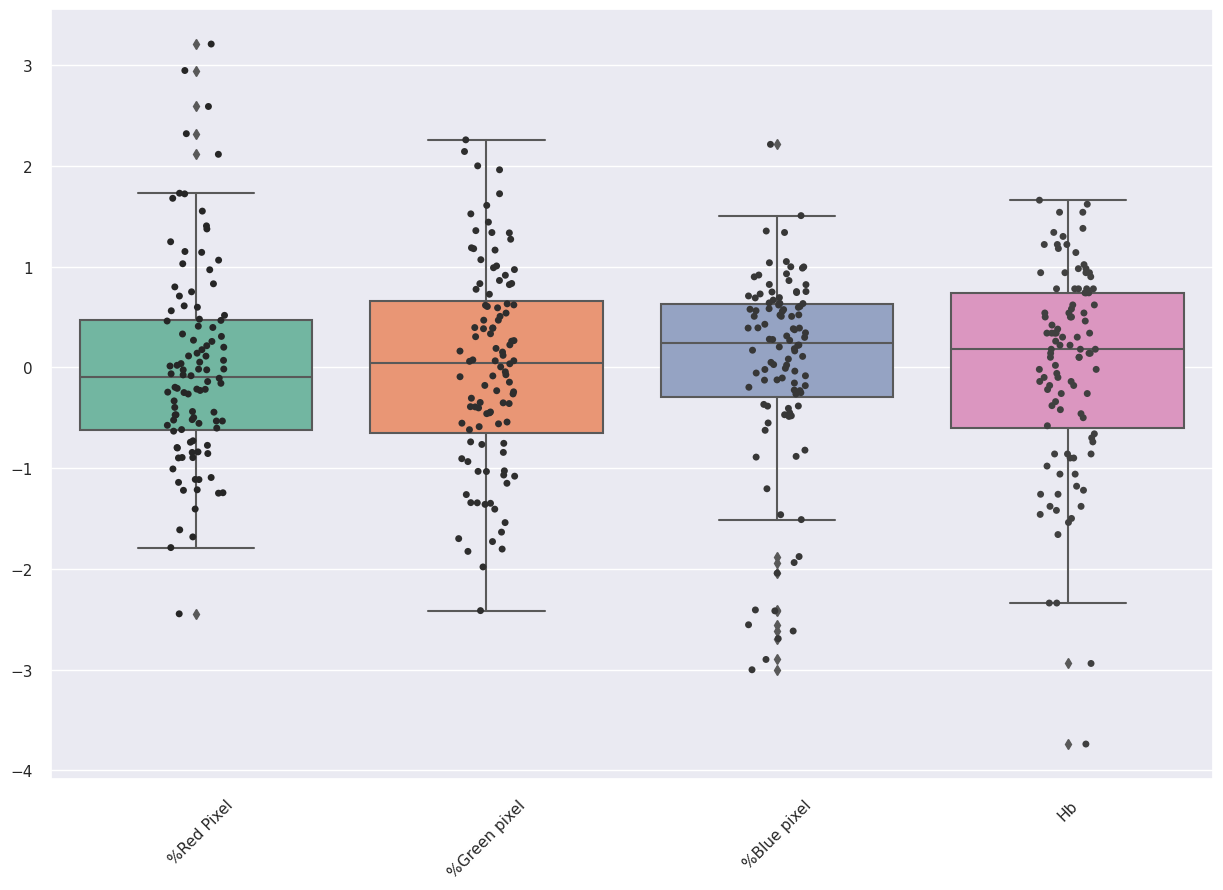

In [34]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

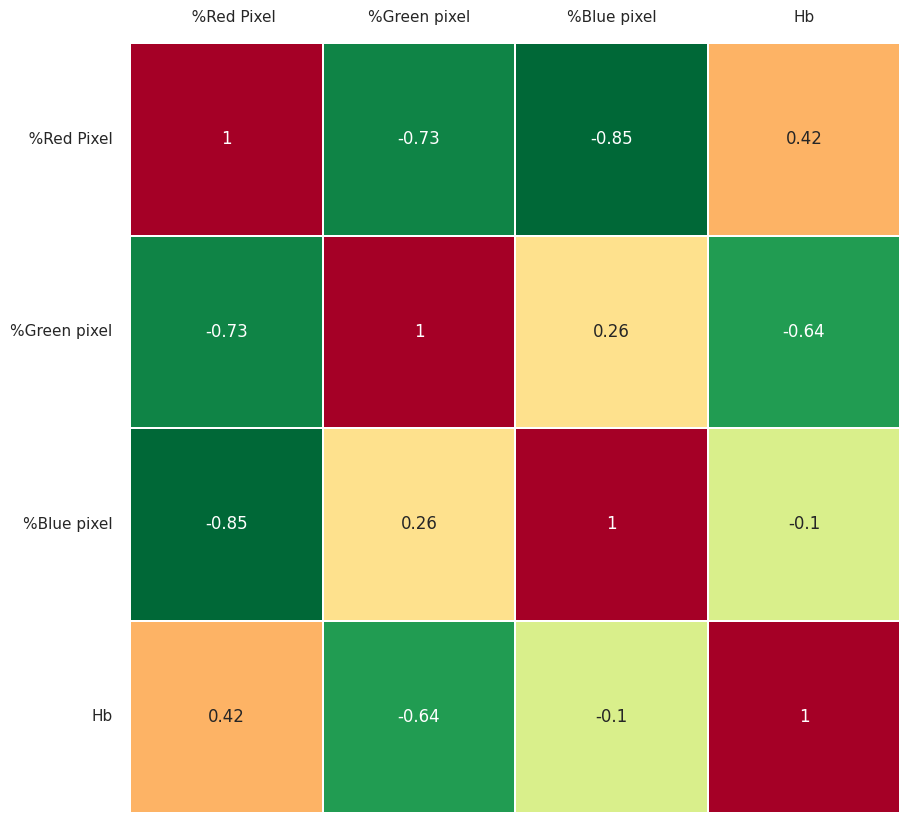

In [35]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

**Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

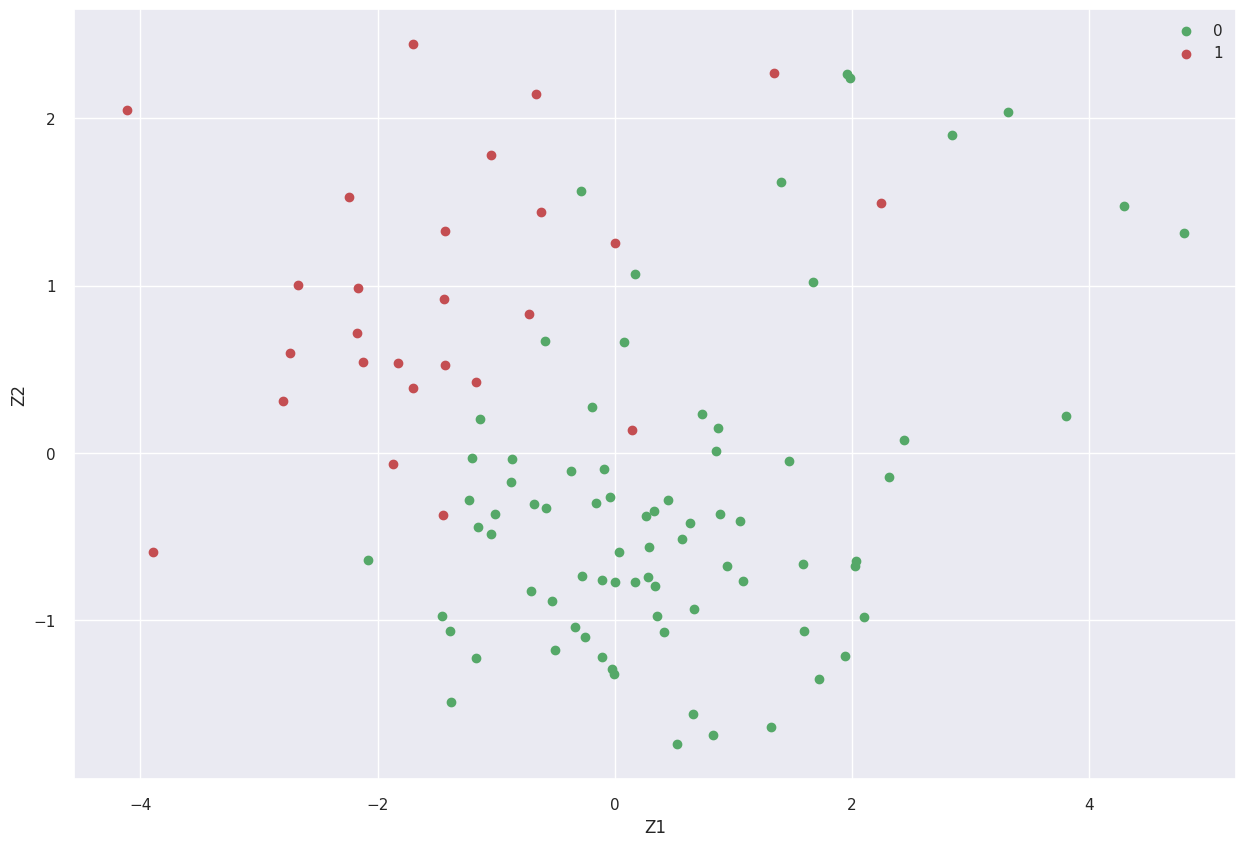

In [36]:
pca = PCA()
Z = pca.fit_transform(X)


idx_0= np.where(y == 0)
idx_1 = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigen Vectors**

array([[ 6.01041504e-01,  2.57458415e-01, -1.31442664e-01,
        -7.45108784e-01],
       [-5.25031194e-01,  3.66751461e-01,  6.48641730e-01,
        -4.11217117e-01],
       [-4.41720011e-01, -6.52558186e-01, -3.21462072e-01,
        -5.25084167e-01],
       [ 4.09847272e-01, -6.11045289e-01,  6.77236199e-01,
        -1.69174127e-06]])

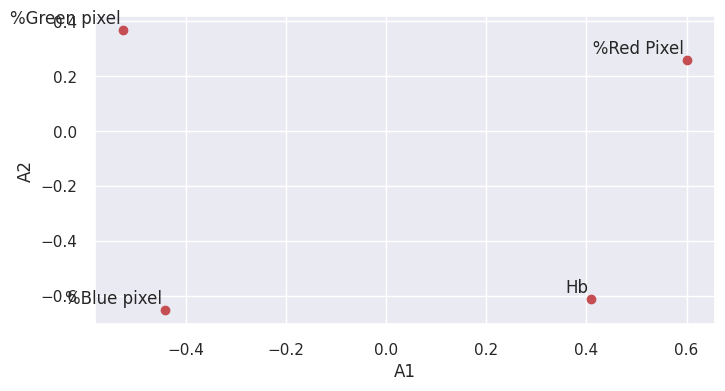

In [37]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A


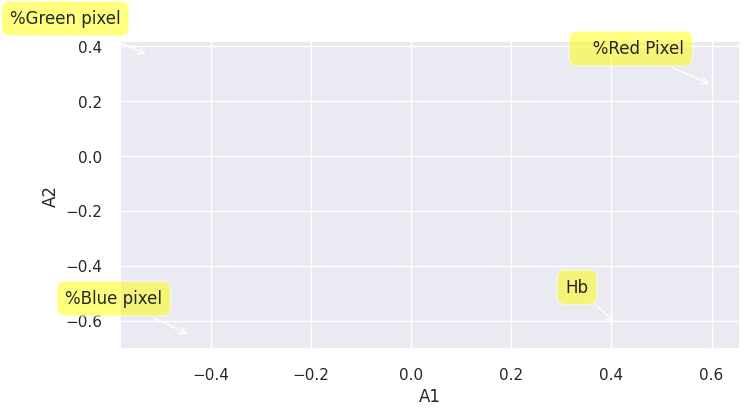

In [38]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

array([2.57528878e+00, 1.10385662e+00, 3.59689547e-01, 1.50454846e-10])

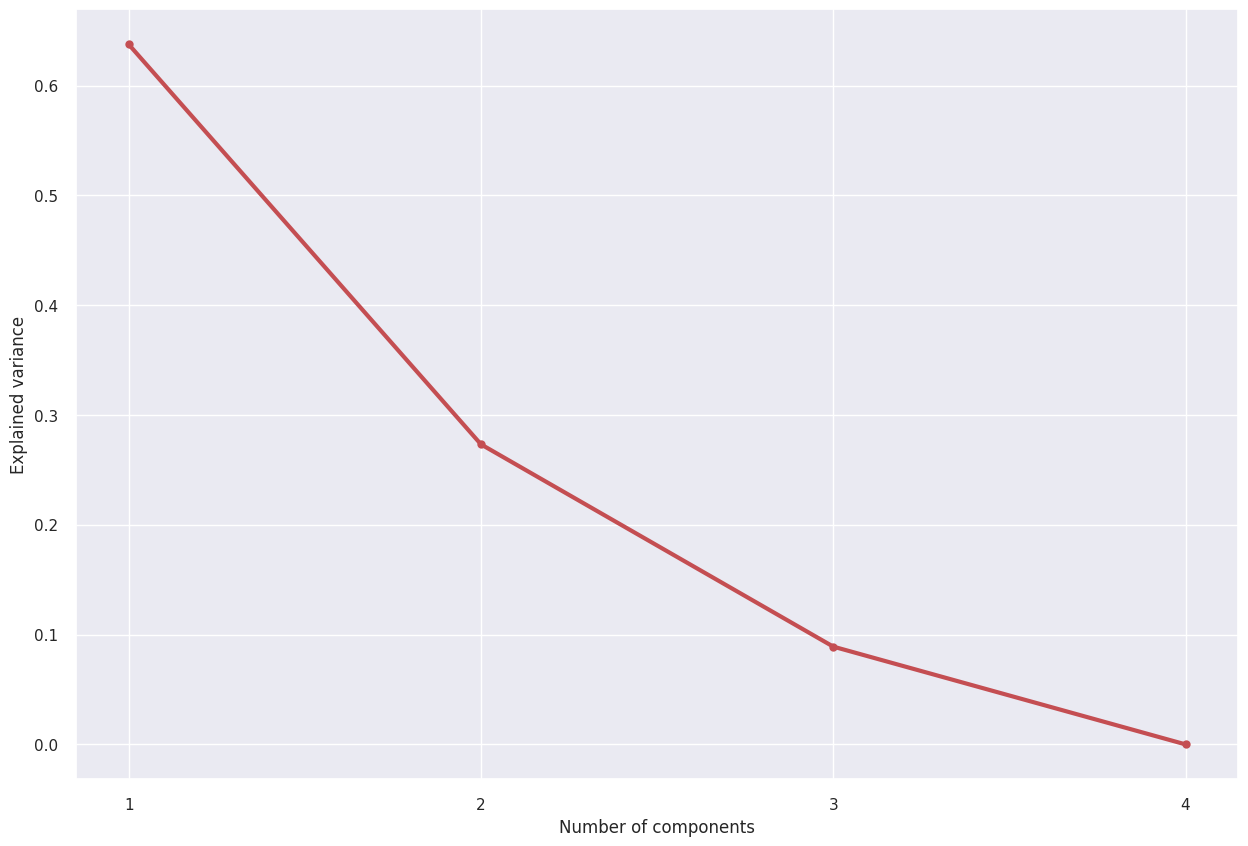

In [39]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda


Text(0, 0.5, 'Cumulative explained variance')

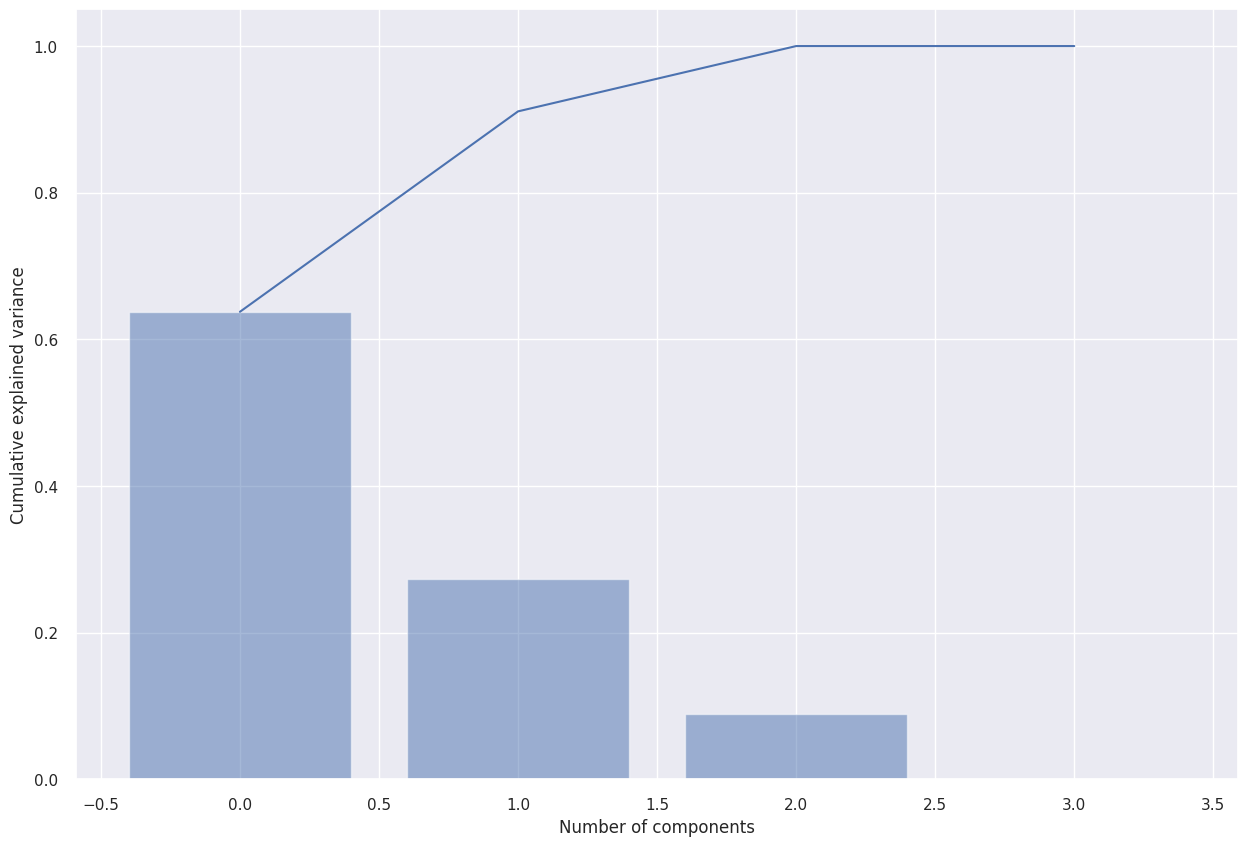

In [40]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


**Biplot**

array([-1.06372833,  1.44069845,  0.20634715, -1.21661146, -1.10006351,
       -0.66407413, -1.06034412, -0.32894009, -0.6727384 , -1.48603643,
       -0.97246792, -0.97363829, -0.76902575, -0.41499096,  0.15226023,
        0.01189675, -0.93128048, -0.6383012 , -1.21156524, -0.76349993,
       -0.75989223, -1.03856163, -0.67504172, -0.64397583, -0.77203913,
       -0.97883741, -0.59163559, -0.34481905, -0.82329876, -1.17678745,
        0.23428261, -0.51268748, -0.27763858,  1.02238194, -0.79605829,
        2.04777399,  2.24259757, -0.17492901,  0.83195659, -1.68472193,
        0.52831435, -0.59251124,  0.27451415,  0.427906  , -0.30510035,
        0.98807937,  1.25425878, -0.03542973,  0.59852184,  2.03861188,
        2.26273872, -1.32282807,  1.47682789,  2.26854686,  2.14827123,
        0.54372807,  1.32462243, -0.88575869, -1.22360957, -0.36958782,
       -1.56007011,  0.07709046, -0.37290668, -0.36535783,  1.07186875,
        1.31343042,  1.61865553,  0.66236679,  0.38928779, -0.14

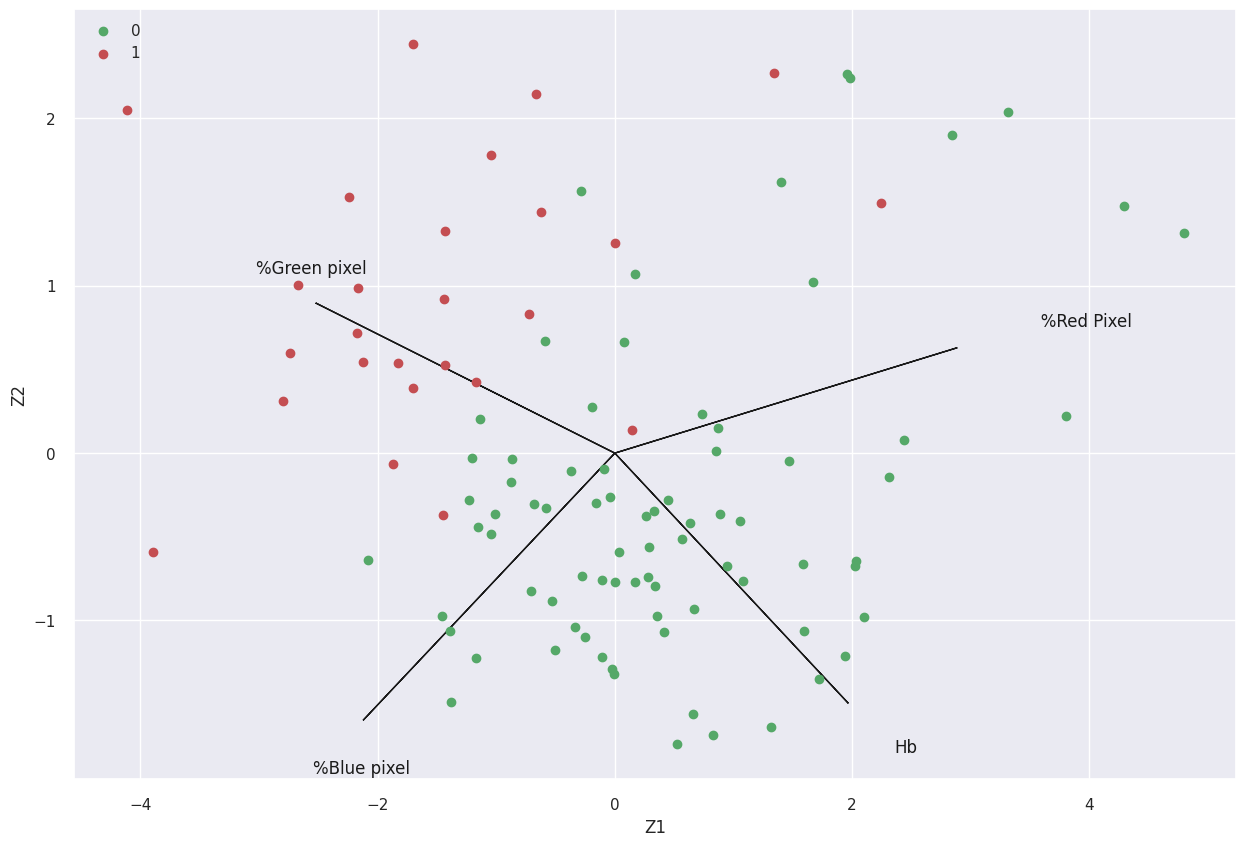

In [41]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')

plt.legend(loc='upper left')
Z1
Z2

**Using PCA Library**

In [42]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.9 MB/s eta 0:00:00


In [43]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [44]:
out['PC']

,PC1,PC2,PC3
0,1.592917,-1.063728,-0.182540
1,-0.622759,1.440698,-0.124630
2,-1.133267,0.206347,1.314265
3,-0.105385,-1.216611,0.471117
4,-0.247649,-1.100064,0.308107
...,...,...,...
99,0.413330,-1.071610,-0.361447
100,-2.793836,0.313325,0.644415
101,-0.589363,0.672651,0.638269
102,-1.042628,-0.484827,0.340574


**Scatter Plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (63.7% expl.var)', ylabel='PC2 (27.3% expl.var)'>)

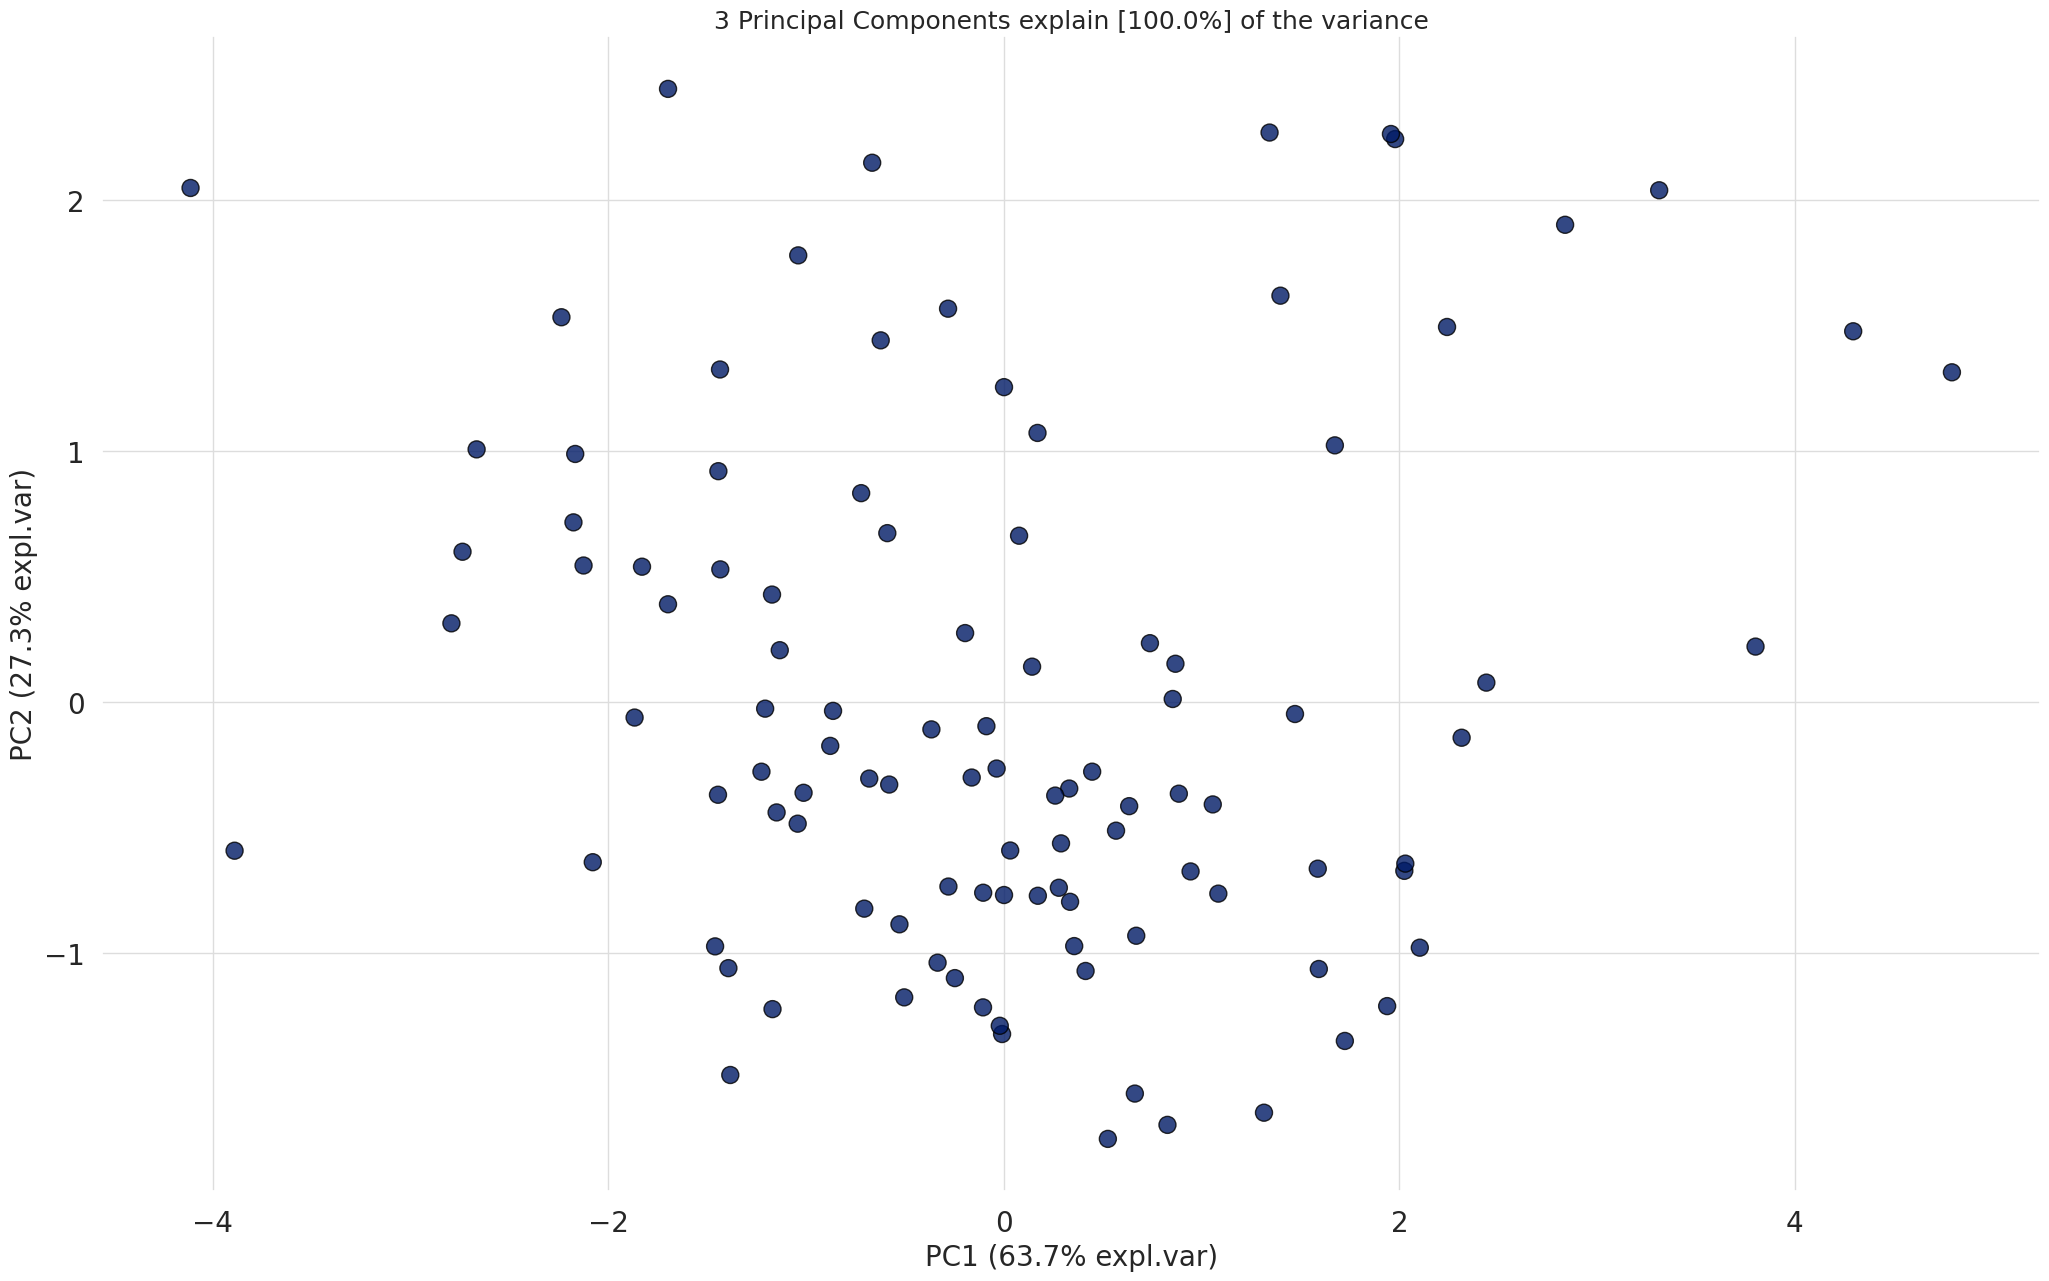

In [45]:
model.scatter(label=True, legend=False)

**Eigen Vectors**

In [46]:
A = out['loadings'].T
A

,PC1,PC2,PC3
%Red Pixel,0.601042,0.257458,-0.131443
%Green pixel,-0.525031,0.366751,0.648642
%Blue pixel,-0.441720,-0.652558,-0.321462
Hb,0.409847,-0.611045,0.677236


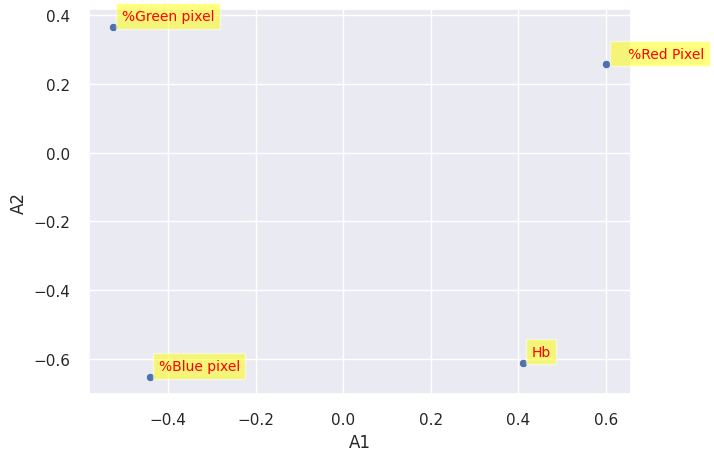

In [47]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

## **Scree Plot**

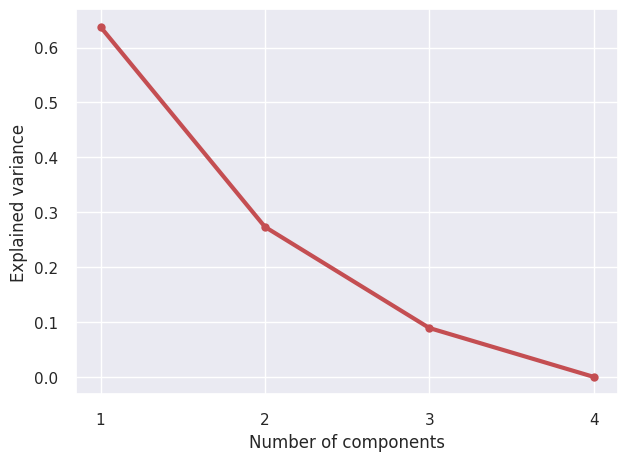

In [48]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

### **Explained Variance Plot**

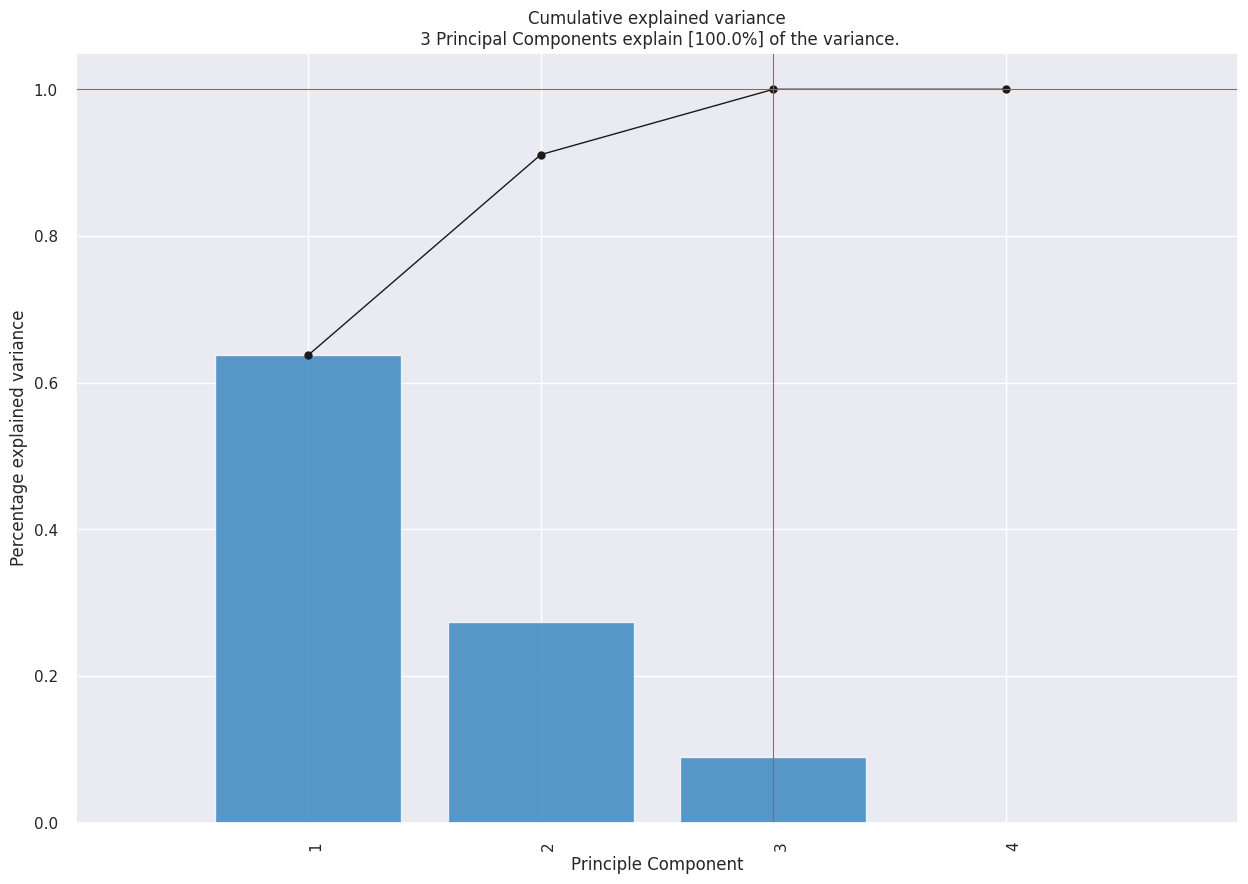

In [49]:
model.plot();

# **Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (63.7% expl.var)', ylabel='PC2 (27.3% expl.var)'>)

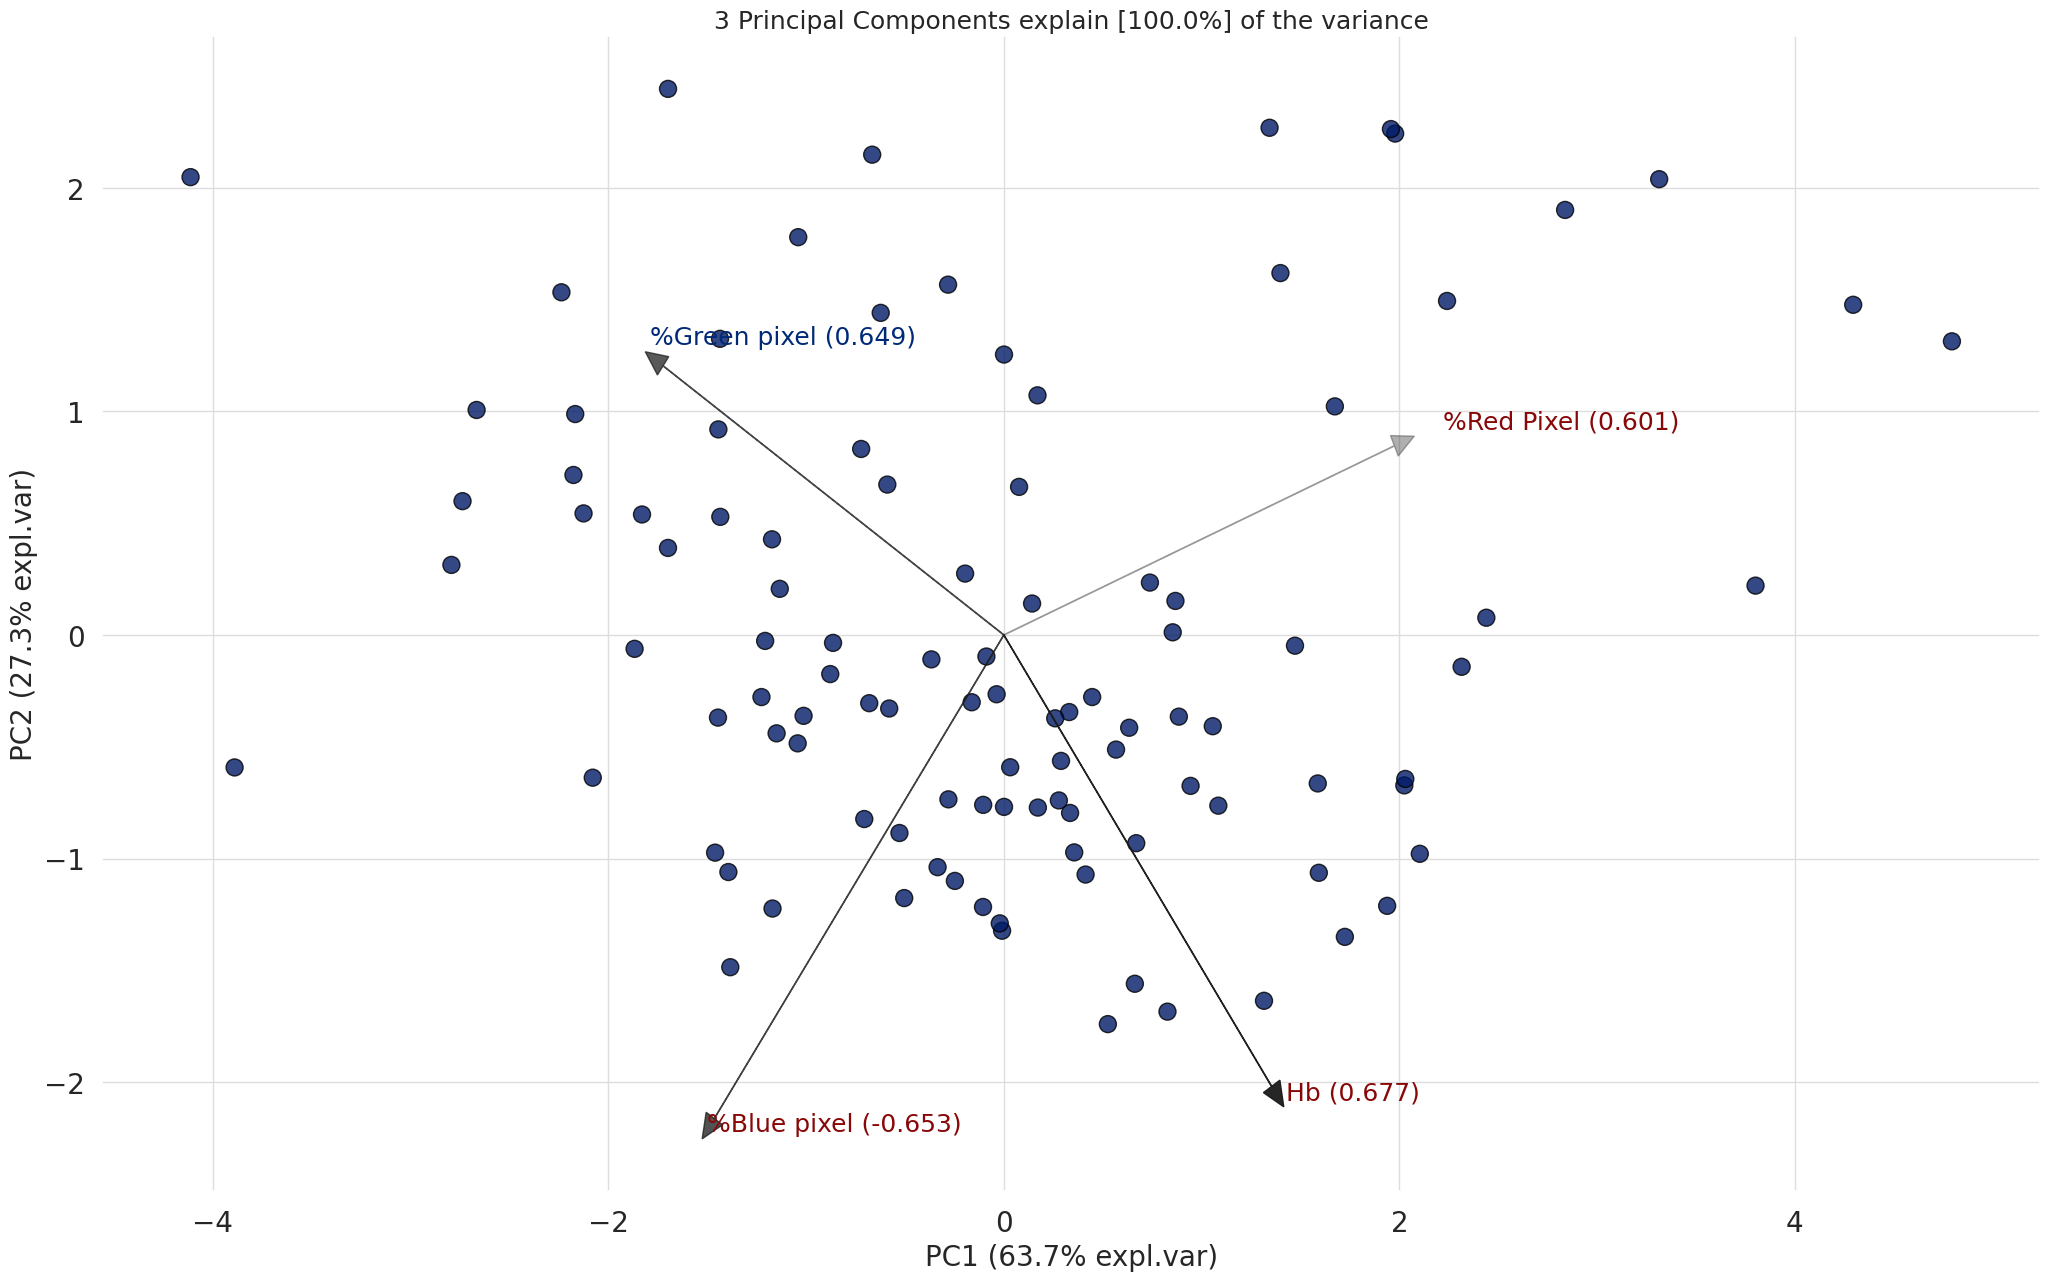

In [50]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (63.7% expl.var)', ylabel='PC2 (27.3% expl.var)', zlabel='PC3 (8.90% expl.var)'>)

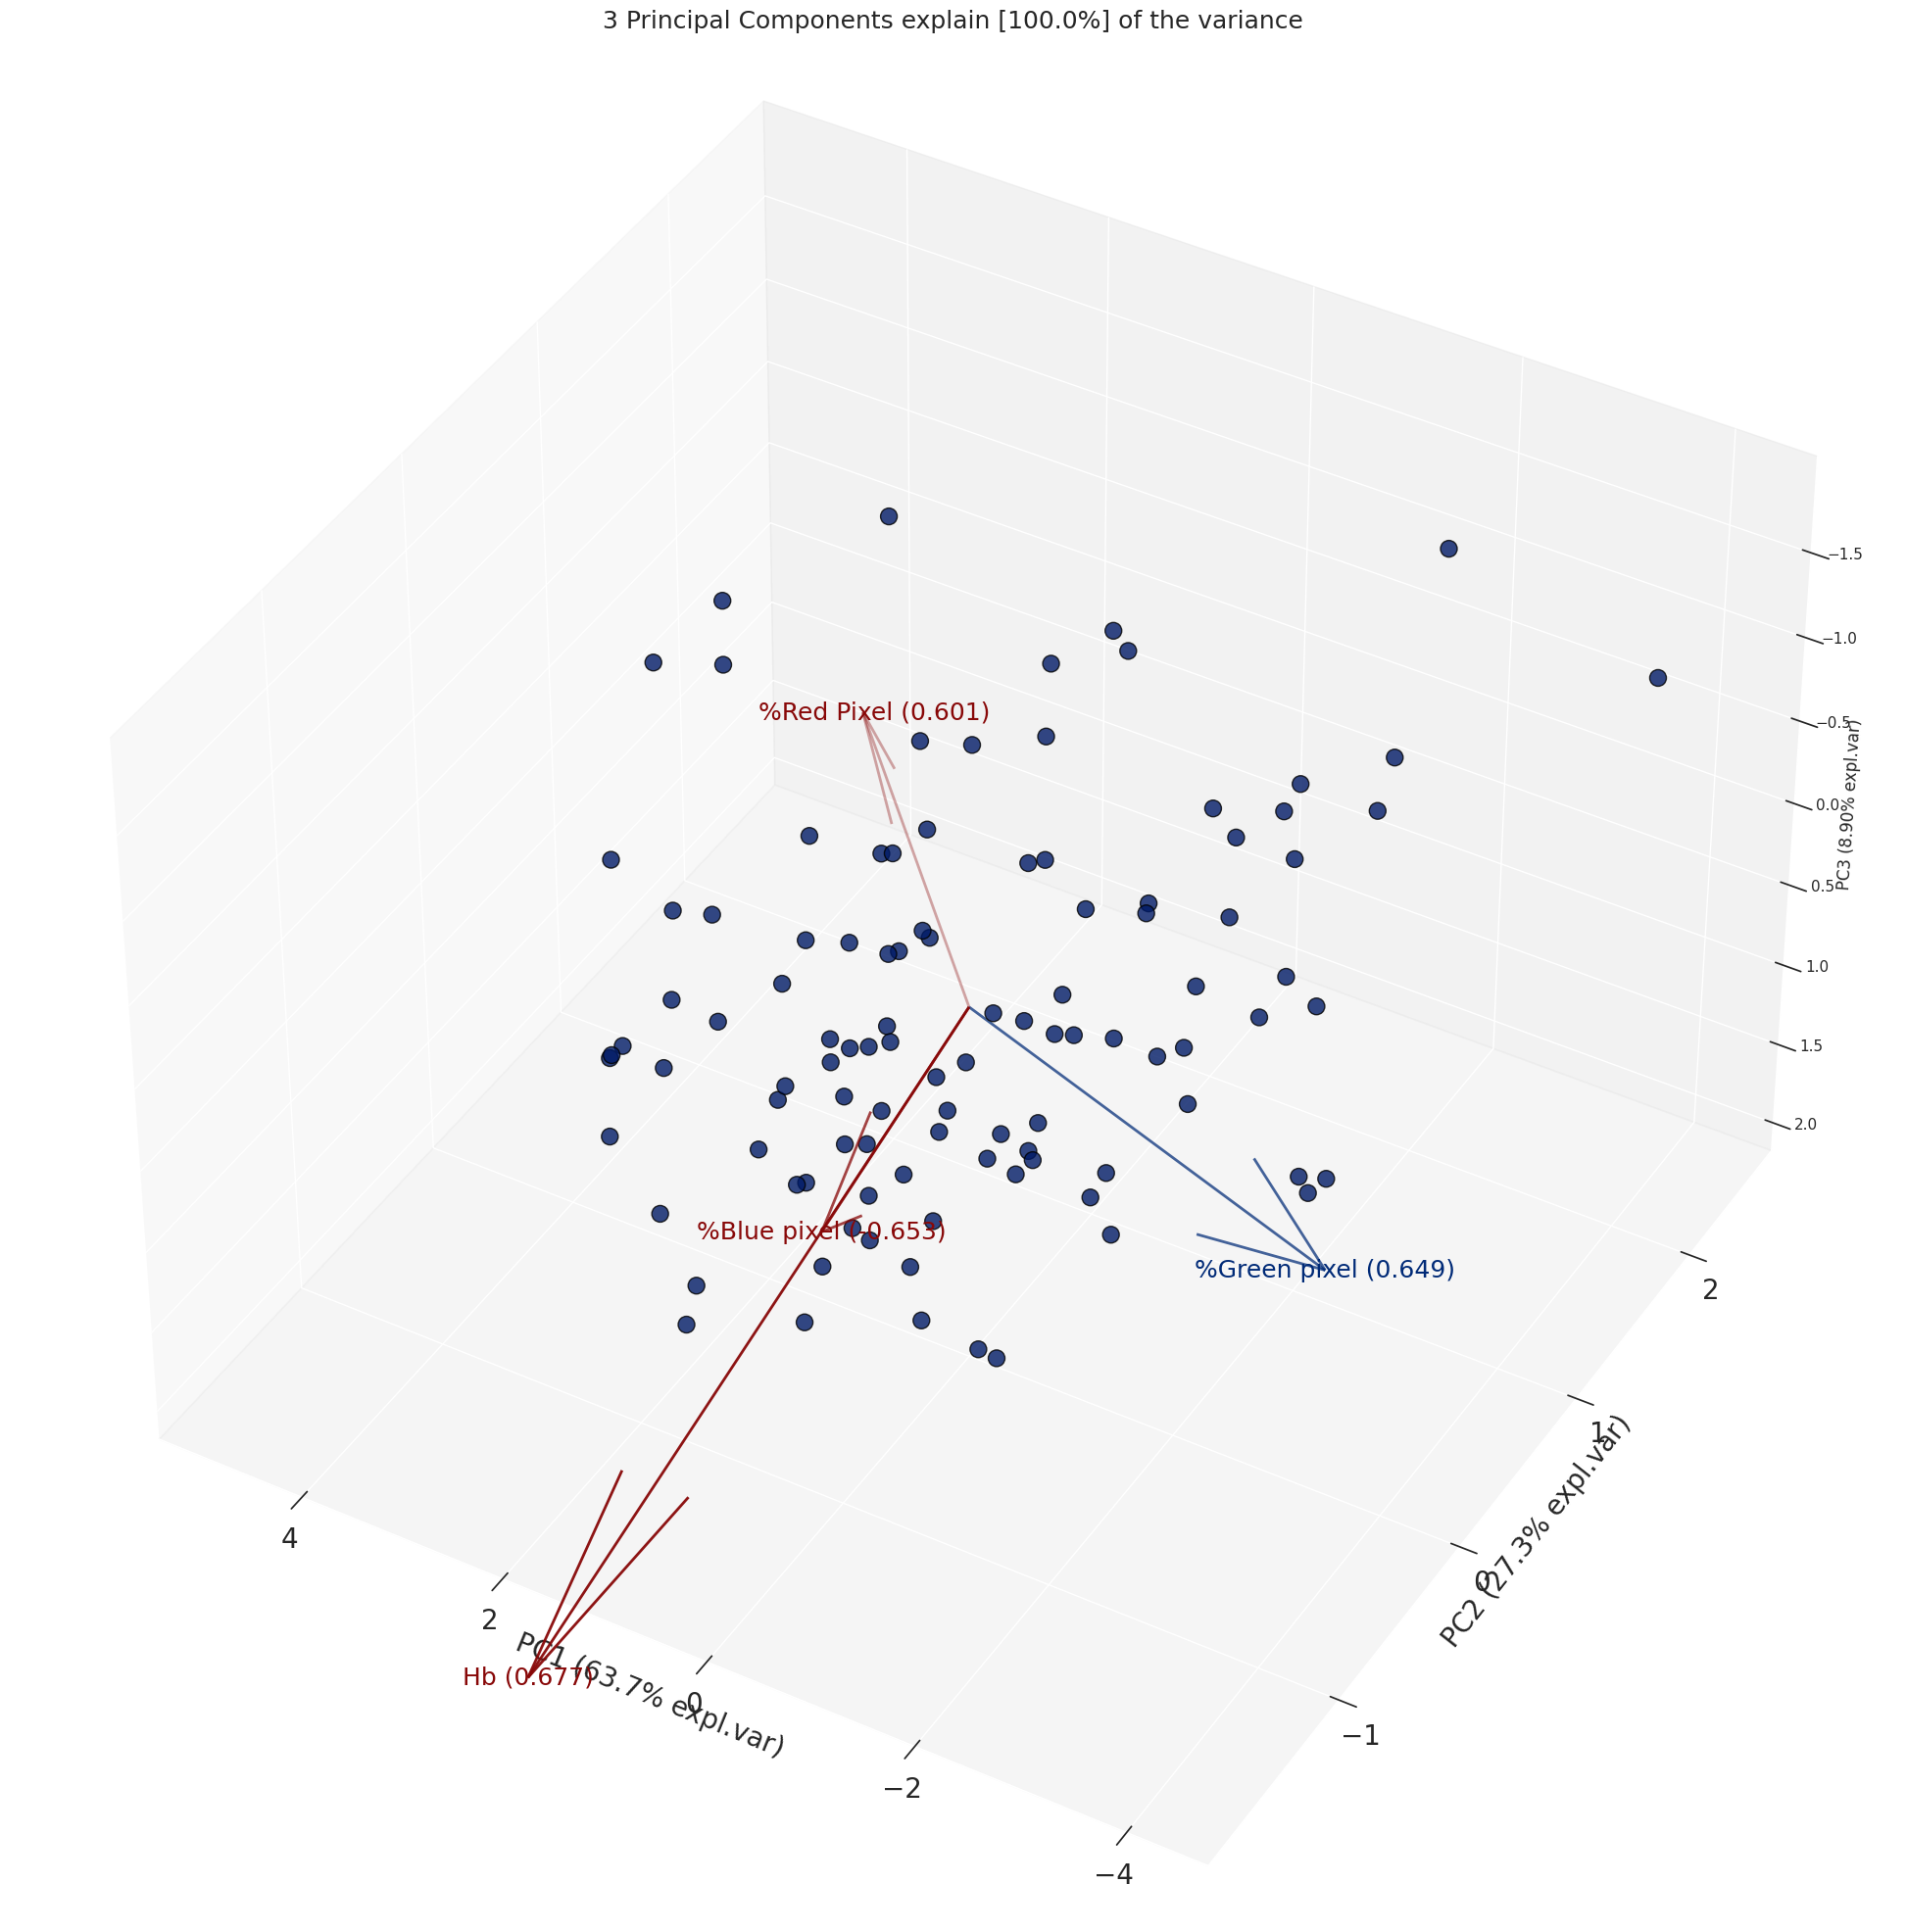

In [51]:
model.biplot3d(legend=False)

**Classification Using Pycaret**

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [52]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [56]:
from pycaret.utils import version
version()

'3.2.0'

In [58]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (94, 5)
Unseen Data For Predictions: (10, 5)


In [59]:
from pycaret.classification import *
clf = setup(data=data, target='Diagnosis', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,Diagnosis
2,Target type,Binary
3,Original data shape,"(94, 5)"
4,Transformed data shape,"(94, 5)"
5,Transformed train set shape,"(65, 5)"
6,Transformed test set shape,"(29, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


**Compare All Models**

In [60]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9714,0.9900,0.9500,0.9667,0.9467,0.9284,0.9376,0.0490
dt,Decision Tree Classifier,0.9571,0.9400,0.9000,0.9667,0.9133,0.8872,0.9021,0.0280
rf,Random Forest Classifier,0.9571,1.0000,0.9000,0.9667,0.9133,0.8872,0.9021,0.1930
ada,Ada Boost Classifier,0.9571,0.9900,0.9000,0.9667,0.9133,0.8872,0.9021,0.1000
lightgbm,Light Gradient Boosting Machine,0.9571,0.9900,0.9000,0.9667,0.9133,0.8872,0.9021,0.2580
ridge,Ridge Classifier,0.9548,0.0000,0.8500,1.0000,0.9000,0.8748,0.8923,0.0280
gbc,Gradient Boosting Classifier,0.9405,0.9900,0.8500,0.9667,0.8800,0.8444,0.8654,0.0770
lda,Linear Discriminant Analysis,0.9405,1.0000,0.8500,0.9667,0.8800,0.8444,0.8654,0.0290
knn,K Neighbors Classifier,0.9381,1.0000,0.9000,0.9167,0.8800,0.8427,0.8641,0.0720
nb,Naive Bayes,0.9381,0.9775,0.9000,0.9167,0.8800,0.8427,0.8641,0.0430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [61]:
best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

**Logistic Regression**

In [62]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the Model**

In [63]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [64]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**

In [65]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Model with K-nearest neigbour**

In [66]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model with K-nearest neighbour**

In [67]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [68]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

**Evaluate model with K-nearest neighbour**

In [69]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [70]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [71]:
tuned_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [134]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

**Evaluate QDA Model**

In [72]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [73]:
!pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 47.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


# **Classification + PCA**

In [74]:
clf_pca = setup(data=data, target='Diagnosis', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components=3)

,Description,Value
0,Session id,123
1,Target,Diagnosis
2,Target type,Binary
3,Original data shape,"(94, 5)"
4,Transformed data shape,"(94, 4)"
5,Transformed train set shape,"(65, 4)"
6,Transformed test set shape,"(29, 4)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


**Comparing Models**

In [75]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9548,0.0000,0.9000,0.9667,0.9133,0.8855,0.9008,0.0390
ridge,Ridge Classifier,0.9548,0.0000,0.8500,1.0000,0.9000,0.8748,0.8923,0.0380
nb,Naive Bayes,0.9405,1.0000,0.8000,1.0000,0.8667,0.8336,0.8569,0.0410
ada,Ada Boost Classifier,0.9405,0.9625,0.9000,0.9333,0.8933,0.8551,0.8739,0.1160
lda,Linear Discriminant Analysis,0.9405,1.0000,0.8500,0.9667,0.8800,0.8444,0.8654,0.0650
knn,K Neighbors Classifier,0.9381,1.0000,0.9000,0.9167,0.8800,0.8427,0.8641,0.0560
xgboost,Extreme Gradient Boosting,0.9381,0.9700,0.8500,0.8333,0.8267,0.7963,0.8093,0.0750
lr,Logistic Regression,0.9238,1.0000,0.8500,0.9167,0.8467,0.8015,0.8286,0.7370
rf,Random Forest Classifier,0.9095,0.9625,0.8000,0.9167,0.8133,0.7603,0.7932,0.2060
qda,Quadratic Discriminant Analysis,0.9071,1.0000,0.8000,0.8167,0.7800,0.7444,0.7654,0.0390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Best Model with PCA

In [76]:
best_model_pca

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# **Tune Best Model**

In [77]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,0.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,0.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Best Model**

In [79]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [78]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [80]:

tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Evaluate Model

In [81]:
tuned_lr_pca

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Create  K-nearest Model**

In [83]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [84]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [150]:

tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

**Evaluate  Model KNN**

In [85]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Create Quadratic Discriminant Analysis Model**

In [86]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [87]:
tuned_qda_pca = tune_model(qda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8571,0.9000,0.5000,1.0000,0.6667,0.5882,0.6455
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [88]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)

## **Evaluate Model**

In [90]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Explainable AI with Shapley values**
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [91]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
2,0.8571,1.0000,1.0000,0.6667,0.8000,0.6957,0.7303
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [92]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8571,1.0000,0.5000,1.0000,0.6667,0.5882,0.6455
4,0.8571,0.9000,0.5000,1.0000,0.6667,0.5882,0.6455
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,1.0000,1.0000,0.5000,0.6667,0.5714,0.6325
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [93]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=9, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.1, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [94]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [95]:
!pip install shap

In [96]:
import shap

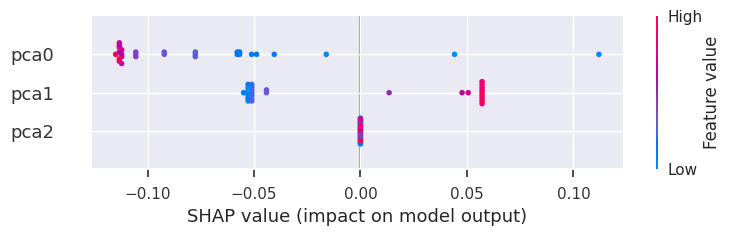

In [97]:
interpret_model(tuned_et_pca, plot='summary')

In [102]:
interpret_model(tuned_et_pca, plot='reason')